In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import os
from random import randint
import cv2
from keras.layers import MaxPool2D,Conv2D,UpSampling2D,Flatten
from keras.layers import Dense,Input
from keras.models import Sequential
from keras.models import Model
from keras.models import *
from keras.layers import *
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
train1 = "C:\\Users\\JYOTHI PRASANNA\\Desktop\\dog_cat_new\\train1\\"
train2 = "C:\\Users\\JYOTHI PRASANNA\\Desktop\\dog_cat_new\\train2\\"
train2 = "C:\\Users\\JYOTHI PRASANNA\\Desktop\\dog_cat_new\\train3\\"
train = "C:\\Users\\JYOTHI PRASANNA\\Desktop\\dog_cat_new\\train\\"
test = "C:\\Users\\JYOTHI PRASANNA\\Desktop\\dog_cat_new\\test\\"

In [3]:
img_size = 256
def label_img(name):
    word_label = name.split('.')[0]
    if word_label == 'cat' : return np.array([1, 0])
    else : return np.array([0, 1])
    
def load_training_data():
    train_data =[]
    for img in os.listdir(DIR):
        label = label_img(img)
        path = os.path.join(DIR,img)
        img = cv2.imread(DIR+img)
        img = cv2.cvtColor(cv2.resize(img,(256,256)),cv2.COLOR_BGR2GRAY)
        (_, blackAndWhiteImage) = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
        train_data.append([np.array(img),label])
        
    
    return shuffle(train_data)
        

In [4]:
from sklearn.utils import shuffle
DIR =train1
train_data = load_training_data()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0 1]')

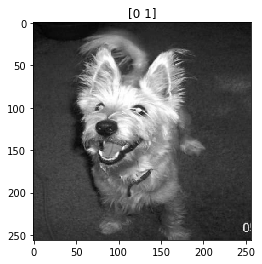

In [5]:
plt.imshow(train_data[3][0],cmap ='gist_gray')
plt.title(train_data[3][1])

In [7]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, 256,256, 1)
trainLabels = np.array([i[1] for i in train_data])

In [8]:
input = Input(shape =(256,256, 1))
x = Conv2D(32, kernel_size = (3, 3), activation='relu')(input)
x = MaxPool2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)
x = Conv2D(64, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)
x = Conv2D(96, kernel_size=(3,3), activation='relu')(x) 
x = MaxPool2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)
x = Conv2D(96, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)
x = Conv2D(64, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

layer = Flatten()(x)
layer = Dense(256, activation='relu')(layer)
layer = Dropout(0.2)(layer)
layer = Dense(128, activation='relu')(layer)
layer = Dense(2, activation = 'softmax')(layer)

model2 = Model(input,layer)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
history = model2.fit(trainImages, trainLabels, batch_size = 32 , epochs = 5, verbose = 1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
300/300 [==============================] - 50s 166ms/step - loss: 0.5740 - acc: 0.7200
Epoch 2/5
300/300 [==============================] - 47s 156ms/step - loss: 0.5149 - acc: 0.8133
Epoch 3/5
300/300 [==============================] - 50s 166ms/step - loss: 0.2908 - acc: 0.8833
Epoch 4/5
 64/300 [=====>........................] - ETA: 42s - loss: 0.1822 - acc: 0.9375

In [ ]:
TEST_DIR = test
def load_test_data():
    test_data =[]
    for img in os.listdir(TEST_DIR):
        label = label_img(img)
        path = os.path.join(TEST_DIR,img)
        img = cv2.imread(TEST_DIR+img)
        img = cv2.cvtColor(cv2.resize(img,(256,256)),cv2.COLOR_BGR2GRAY)
        (_, blackAndWhiteImage) = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
        test_data.append([np.array(img),label])
        
    
    return shuffle(test_data)
        

test_data = load_test_data()    
plt.imshow(test_data[10][0], cmap = 'gist_gray')

In [ ]:
testImages = np.array([i[0] for i in test_data]).reshape(-1, 256,256, 1)
testLabels = np.array([i[1] for i in test_data])

loss, acc = model2.evaluate(testImages, testLabels, verbose = 0)
print(acc * 100)

In [12]:
img_size = 256
def label_img1(name):
    word_label = name.split('.')[0]
    if word_label == 'dog' : return np.array([1, 0])
    else : return np.array([0, 1])
    
def load_training_data1():
    train_data1 =[]
    for img in os.listdir(DIR1):
        label = label_img1(img)
        path = os.path.join(DIR1,img)
        img = cv2.imread(DIR1+img)
        img = cv2.cvtColor(cv2.resize(img,(256,256)),cv2.COLOR_BGR2GRAY)
        (_, blackAndWhiteImage) = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
        train_data1.append([np.array(img),label])
        
    
    return shuffle(train_data1)

In [13]:
from sklearn.utils import shuffle
DIR1 =train2
train_data1 = load_training_data1()

Text(0.5, 1.0, '[1 0]')

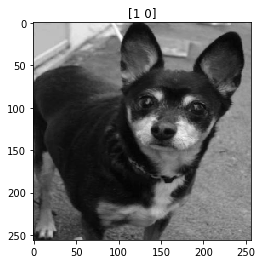

In [14]:
plt.imshow(train_data1[3][0],cmap ='gist_gray')
plt.title(train_data1[3][1])

In [15]:
trainImages1 = np.array([i[0] for i in train_data1]).reshape(-1, 256,256, 1)
trainLabels1 = np.array([i[1] for i in train_data1])

In [16]:
x1 = Conv2D(32, kernel_size = (3, 3), activation='relu')(input)
x1 = MaxPool2D(pool_size=(2,2))(x1)
x1 = BatchNormalization()(x1)
x1 = Conv2D(64, kernel_size=(3,3), activation='relu')(x1)
x1 = MaxPool2D(pool_size=(2,2))(x1)
x1 = BatchNormalization()(x1)
x1 = Conv2D(96, kernel_size=(3,3), activation='relu')(x1) 
x1 = MaxPool2D(pool_size=(2,2))(x1)
x1 = BatchNormalization()(x1)
x1 = Conv2D(96, kernel_size=(3,3), activation='relu')(x1)
x1 = MaxPool2D(pool_size=(2,2))(x1)
x1 = BatchNormalization()(x1)
x1 = Conv2D(64, kernel_size=(3,3), activation='relu')(x1)
x1 = MaxPool2D(pool_size=(2,2))(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.2)(x1)
x1.trainable =True

layer1 = Flatten()(x1)
layer1 = Dense(256, activation='relu')(layer1)
layer1 = Dropout(0.2)(layer1)
layer1 = Dense(128, activation='relu')(layer1)
layer1 = Dense(2, activation = 'softmax')(layer1)

model3 = Model(input,layer1)

In [17]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [18]:
history1 = model3.fit(trainImages1, trainLabels1, batch_size = 32 , epochs = 5, verbose = 1)

Epoch 1/5
300/300 [==============================] - 44s 148ms/step - loss: 0.6547 - acc: 0.7433
Epoch 2/5
300/300 [==============================] - 41s 137ms/step - loss: 0.4210 - acc: 0.8433
Epoch 3/5
300/300 [==============================] - 41s 138ms/step - loss: 0.2868 - acc: 0.8933
Epoch 4/5
300/300 [==============================] - 42s 140ms/step - loss: 0.1790 - acc: 0.9233
Epoch 5/5
300/300 [==============================] - 44s 148ms/step - loss: 0.0870 - acc: 0.9767


In [23]:
testImages1 = np.array([i[0] for i in test_data]).reshape(-1, 256,256, 1)
testLabels1 = np.array([i[1] for i in test_data])

loss, acc = model3.evaluate(testImages1, testLabels1, verbose = 0)
print(acc * 100)

5.0


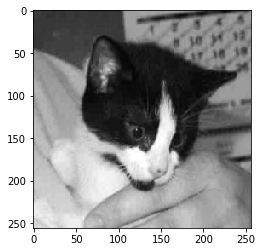

In [24]:
TEST_DIR = test
def load_test_data1():
    test_data1 =[]
    for img in os.listdir(TEST_DIR):
        label = label_img1(img)
        path = os.path.join(TEST_DIR,img)
        img = cv2.imread(TEST_DIR+img)
        img = cv2.cvtColor(cv2.resize(img,(256,256)),cv2.COLOR_BGR2GRAY)
        (_, blackAndWhiteImage) = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
        test_data1.append([np.array(img),label])
        
    
    return shuffle(test_data1)
        

test_data1 = load_test_data1()    
plt.imshow(test_data1[10][0], cmap = 'gist_gray')

In [ ]:
img_size = 256
def label_img2(name):
    word_label = name.split('.')[0]
    if word_label == 'horse' : return np.array([1, 0])
    else : return np.array([0, 1])
    
def load_training_data2():
    train_data3 =[]
    for img in os.listdir(DIR):
        label = label_img(img)
        path = os.path.join(DIR,img)
        img = cv2.imread(DIR+img)
        img = cv2.cvtColor(cv2.resize(img,(256,256)),cv2.COLOR_BGR2GRAY)
        (_, blackAndWhiteImage) = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
        train_data3.append([np.array(img),label])
        
    
    return shuffle(train_data3)
        

In [ ]:
from sklearn.utils import shuffle
DIR =train3
train_data3 = load_training_data2()

In [25]:
filenames = sorted(os.listdir(train))
p4=0
d4=[]
for img_name in filenames:
    img = plt.imread(train + img_name)
    img  = np.resize(img, (256, 256))
    if p4==0:
      imgs4=(img)
      p4=1
    else:
      imgs4 = np.append(imgs4, img, axis=0)
    res = img_name[:3]
    d4.append(res)
print(d4)
    
print(imgs4.shape)
        
img_data = np.array(imgs4)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat'

(102400, 256)

In [26]:
imgs4 = np.reshape(imgs4, [ 400, 256, 256])
train_images, test_images = train_test_split(imgs4,test_size=0.33, random_state=42)
nRows,nCols = train_images.shape[1:]
nDims = nRows
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, 1)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, 1)
input_shape = (nRows, nCols, 1)
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
train_data /= 255
test_data /= 255
print(train_images.shape)
print(test_images.shape)

(268, 256, 256)
(132, 256, 256)


In [27]:
imgs = np.reshape(imgs4, [ 400, 256, 256])
train_images, test_images, train_labels, test_labels = train_test_split(imgs4, d4, test_size=0.33, random_state=42)
print('Training data shape : ', train_images.shape, len(train_labels))
print('Testing data shape : ', test_images.shape, len(test_labels))
classes = np.unique(train_labels)
classes=np.append(classes,0)
nClasses = len(classes)

print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (268, 256, 256) 268
Testing data shape :  (132, 256, 256) 132
Total number of outputs :  3
Output classes :  ['cat' 'dog' '0']


In [28]:
train_labels=[0 if x=='cat' else 1 for x in train_labels]
print(train_labels)
len(train_labels)

[1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0]


268

In [29]:
test_labels=[0 if x=='cat' else 1 for x in test_labels]
print(test_labels)
len(test_labels)

[1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0]


132

In [30]:
from keras.utils import to_categorical

nRows,nCols = train_images.shape[1:]
nDims = nRows
print(nCols)
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, 1)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, 1)
input_shape = (nRows, nCols, 1)
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
train_data /= 255
test_data /= 255
print(len(train_labels))
print(len(test_labels))
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
print('Original label : ', train_labels[11])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[11])
print('Original label : ', test_labels[11])
print('After conversion to categorical ( one-hot ) : ', test_labels_one_hot[11])

256
268
132
Original label :  0
After conversion to categorical ( one-hot ) :  [1. 0.]
Original label :  1
After conversion to categorical ( one-hot ) :  [0. 1.]


In [31]:
from keras.layers import Activation

input_shape =(256,256,1)
a = Flatten()(x)
a = Activation('relu')(a)
b = Flatten()(x1)
b = Activation('relu')(b)
mergedOut = concatenate([a,b], axis = 0)
mergedOut = Dense(256, activation='relu')(mergedOut)
mergedOut = Dropout(0.2)(mergedOut)
mergedOut = Dense(128, activation='relu')(mergedOut)
mergedOut = Dense(2, activation = 'softmax')(mergedOut)

model4 = Model(input,mergedOut)

In [32]:
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [33]:
model4.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 254, 254, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 254, 254, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 127, 127, 32) 0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [34]:
history3 = model4.fit(train_data,train_labels_one_hot,batch_size=1,epochs=20,validation_data=(test_data, test_labels_one_hot))

Train on 268 samples, validate on 132 samples
Epoch 1/20
268/268 [==============================] - 79s 294ms/step - loss: 1.0862 - acc: 0.4963 - val_loss: 0.7064 - val_acc: 0.4697
Epoch 2/20
268/268 [==============================] - 76s 285ms/step - loss: 0.7445 - acc: 0.5317 - val_loss: 0.8909 - val_acc: 0.4773
Epoch 3/20
268/268 [==============================] - 76s 284ms/step - loss: 0.7192 - acc: 0.5429 - val_loss: 0.7227 - val_acc: 0.4735
Epoch 4/20
268/268 [==============================] - 79s 293ms/step - loss: 0.6643 - acc: 0.6138 - val_loss: 1.7127 - val_acc: 0.4659
Epoch 5/20
268/268 [==============================] - 78s 292ms/step - loss: 0.6395 - acc: 0.6660 - val_loss: 0.9648 - val_acc: 0.5455
Epoch 6/20
268/268 [==============================] - 76s 283ms/step - loss: 0.5336 - acc: 0.7257 - val_loss: 0.8686 - val_acc: 0.4659
Epoch 7/20
268/268 [==============================] - 76s 282ms/step - loss: 0.4593 - acc: 0.7948 - val_loss: 1.9861 - val_acc: 0.4773
Epoch 8/2

In [35]:
imgcat=cv2.imread("C:\\Users\\JYOTHI PRASANNA\\Desktop\\dog_cat_new\\test\\1.jpg")
imgdog=cv2.imread("C:\\Users\\JYOTHI PRASANNA\\Desktop\\dog_cat_new\\test\\1.jpg")
imgcat=cv2.resize(imgcat,(256,256))
imgcat = cv2.cvtColor(cv2.resize(imgcat,(256,256)),cv2.COLOR_BGR2GRAY)
imgcat=imgcat.reshape(1,256,256,1)
imgdog=cv2.resize(imgdog,(256,256))
imgdog = cv2.cvtColor(cv2.resize(imgdog,(256,256)),cv2.COLOR_BGR2GRAY)
imgdog=imgdog.reshape(1,256,256,1)
images=([imgcat])
prediction=model4.predict([imgcat],steps=1)

In [36]:
prediction

array([[0., 1.],
       [0., 1.]], dtype=float32)

In [37]:
model4.evaluate(test_data, test_labels_one_hot,batch_size= 1)

132/132 [==============================] - 7s 57ms/step


[2.267309458205793, 0.4696969696969697]

In [38]:
prediction1=model3.predict([imgdog],steps=1)

In [39]:
prediction2=model2.predict([imgcat],steps=1)

In [40]:
prediction1

array([[1., 0.]], dtype=float32)